Spotify Song Analysis (Tune Squad)
Team Members: Geo Mirador, Pema Yangzom, Ralph Watson-Quartey, King D. Nsiah

Project Goals:
1. Determine Most Popular Songs by Artist and Genre
2. Determine top 10 Artists of the decade (by count and by popularity rating)
3. Determine top 10 Genres of the decade (by count and by popularity rating)
4. Compare audio features between (2010 to 2012), (2013 to 2015), and (2016 to 2019)
   and determine if they contribute to the popularity of songs.
5. Analyze trend in the popularity ratings.
6. 

In [ ]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Read in file and create dataframe
spotify = pd.read_csv('../resources/top_spotify_songs_2010_2019.csv', encoding='ISO-8859-1')
spotify_df = pd.DataFrame(spotify)
spotify_df

,Index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
#Renaming Spotify Dataset Columns
spotify_df = spotify_df.rename(columns={"title":"Title","artist":"Artist","top genre":"Genre","year":"Year",
                                        "bpm":"Tempo","nrgy":"Energy","dnce":"Danceability","dB":"Loudness","live":"Liveness","val":"Valence",
                                        "dur":"Length","acous":"Acousticness","spch":"Speechiness","pop":"Popularity"})
spotify_df.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [10]:
#Counting number of times an artist made the list within the 10 year period
#Top artists by count
top_artists_df = pd.DataFrame(spotify_df['Artist'].value_counts().head(10))
top_artists_df['Index'] = top_artists_df.index
top_artists_df = top_artists_df.rename(columns={"Artist":"Count","Index":"Artist"})
top_artists_df.head(20)

,Count,Artist
Katy Perry,17,Katy Perry
Justin Bieber,16,Justin Bieber
Maroon 5,15,Maroon 5
Rihanna,15,Rihanna
Lady Gaga,14,Lady Gaga
Bruno Mars,13,Bruno Mars
The Chainsmokers,11,The Chainsmokers
Pitbull,11,Pitbull
Ed Sheeran,11,Ed Sheeran
Shawn Mendes,11,Shawn Mendes


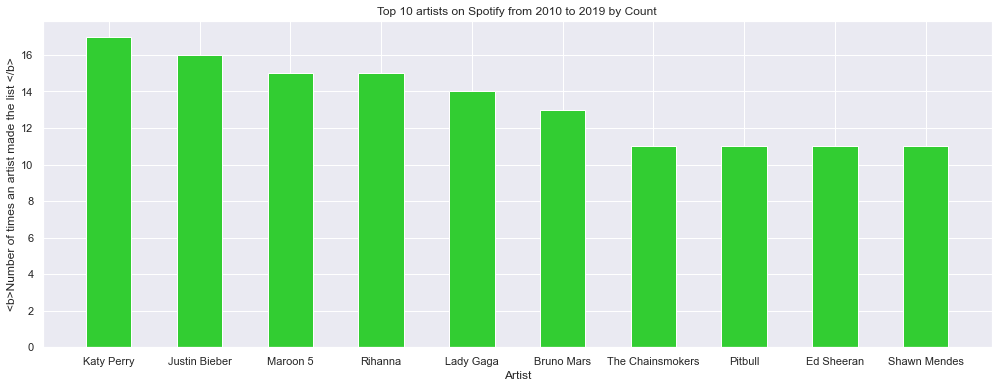

In [59]:
#Plot top artists
plt.figure(figsize=(17,6))
plt.bar(top_artists_df['Artist'], top_artists_df['Count'], width = 0.5, color = 'limegreen')
plt.xlabel('Artist')
plt.ylabel('<b>Number of times an artist made the list </b>')
plt.title('Top 10 artists on Spotify from 2010 to 2019 by Count')
plt.show()

In [6]:
#Counting number of times a Genre made the top list within the 10 year period
#Top Genre by count
genre_df = pd.DataFrame(spotify_df['Genre'].value_counts().head(10))
genre_df['Index'] = genre_df.index
genre_df = genre_df.rename(columns={"Genre":"Count","Index":"Genre"})
genre_df

,Count,Genre
dance pop,327,dance pop
pop,60,pop
canadian pop,34,canadian pop
boy band,15,boy band
barbadian pop,15,barbadian pop
electropop,13,electropop
british soul,11,british soul
big room,10,big room
neo mellow,9,neo mellow
canadian contemporary r&b,9,canadian contemporary r&b


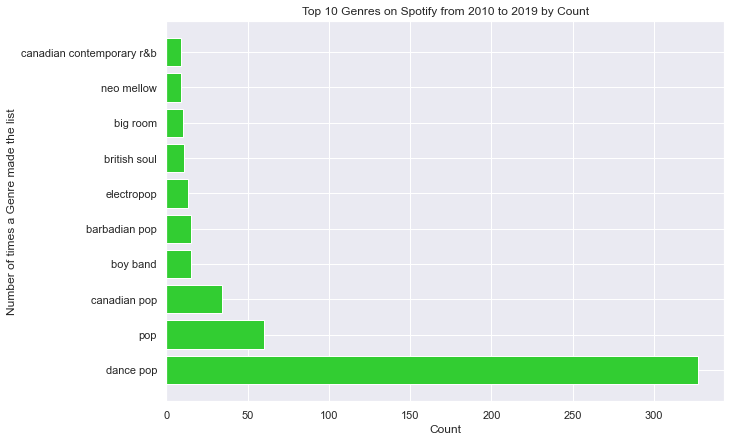

In [60]:
#Plot top genre
plt.figure(figsize=(10,7))
plt.barh(genre_df['Genre'], genre_df['Count'], color = 'limegreen')
plt.xlabel('Count')
plt.ylabel('Number of times a Genre made the list')
plt.title('Top 10 Genres on Spotify from 2010 to 2019 by Count')
plt.show()

In [15]:
#Counting number of times a song stayed in the top list within the 10 year period
spotify_df['Title'].value_counts().head()

A Little Party Never Killed Nobody (All We Got)    2
All I Ask                                          2
Written in the Stars (feat. Eric Turner)           2
Company                                            2
Here                                               2
Name: Title, dtype: int64

In [ ]:
#First Third of dataset
first_third_df = spotify_df.iloc[:201]
first_third_df

In [ ]:
#Second Third of dataset
second_third_df = spotify_df.iloc[201:402]
second_third_df.head()

In [ ]:
#Final Third of dataset
final_third_df = spotify_df.iloc[402:]
final_third_df.head()

In [16]:
#2010 to 2012 dataset
df1 = spotify_df[spotify_df['Year'] <= 2012]
df1.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [17]:
#2013 to #2015 dataset
df2 = spotify_df[(spotify_df['Year'] >= 2013) & (spotify_df['Year'] <= 2015)]
df2.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
139,140,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
140,141,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
141,142,Story of My Life,One Direction,boy band,2013,121,66,60,-6,12,29,245,23,5,81
142,143,Just Give Me a Reason (feat. Nate Ruess),P!nk,dance pop,2013,95,55,78,-7,13,44,243,35,5,81
143,144,Hall of Fame,The Script,celtic rock,2013,85,87,42,-4,12,63,203,7,6,80


In [18]:
#2016 to #2019 dataset
df3 = spotify_df[(spotify_df['Year'] >= 2016) & (spotify_df['Year'] <= 2019)]
df3.head()


,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,81


In [ ]:
#This is something from Pema
pema_df = spotify_df[spotify_df['Artist'] == 'Katy Perry']
artist_df2 = spotify_df[spotify_df['Artist'] == 'Justin Bieber']
artist_df3 = spotify_df[spotify_df['Artist'] == 'Rihanna']
artist_df4 = spotify_df[spotify_df['Artist'] == 'Maroon 5']
artist_df5 = spotify_df[spotify_df['Artist'] == 'Lady Gaga']
pema_df.head()

In [ ]:
#pema_df['Genre'].value_counts()
#artist_df2['Genre'].value_counts()
#artist_df3['Genre'].value_counts()
#artist_df4['Genre'].value_counts()
#artist_df5['Genre'].value_counts()

In [24]:
# Get Describe Values
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d3

,Index,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,483.50000,2017.191667,114.825000,66.966667,65.737500,-6.016667,15.966667,48.775000,217.412500,16.004167,8.787500,70.291667
std,69.42622,1.041369,24.054388,16.235935,13.535706,3.922862,11.816897,21.718227,31.477306,21.027278,7.462644,13.916304
min,364.00000,2016.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,148.000000,0.000000,0.000000,0.000000
25%,423.75000,2016.000000,100.000000,58.750000,58.750000,-7.000000,9.000000,32.000000,197.000000,2.750000,4.000000,64.000000
50%,483.50000,2017.000000,110.000000,70.000000,67.000000,-6.000000,11.500000,49.000000,214.000000,8.000000,6.000000,72.000000
75%,543.25000,2018.000000,125.000000,80.000000,75.000000,-5.000000,19.000000,64.250000,232.000000,19.250000,10.250000,80.000000
max,603.00000,2019.000000,192.000000,95.000000,97.000000,-2.000000,74.000000,97.000000,403.000000,99.000000,44.000000,99.000000


<Figure size 1080x648 with 0 Axes>

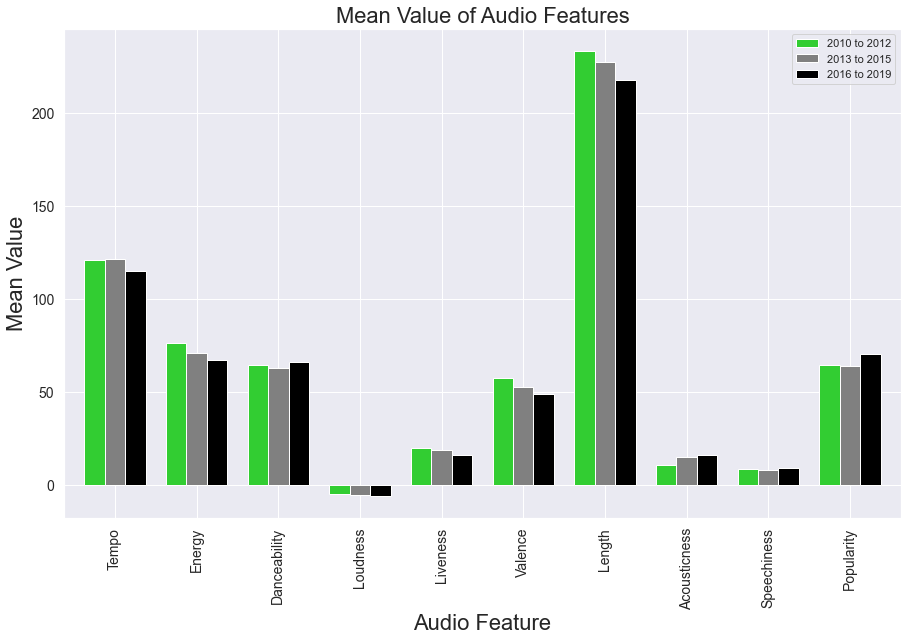

In [63]:
sns.set()

#Set width and height of graph
plt.figure(figsize=(15,9))


#Group bar plots
averages = pd.concat([d1.iloc[1,2:12].rename('2010 to 2012'),
                      d2.iloc[1,2:12].rename('2013 to 2015'),
                      d3.iloc[1,2:12].rename('2016 to 2019')], axis =1).plot(kind='bar',
                                                                       width =0.75,
                                                                       fontsize = 14,
                                                                
                                                                       color = ['limegreen','grey','black'])

#Set graph title and labels
averages.set_title('Mean Value of Audio Features', fontsize=22)
averages.set_xlabel('Audio Feature', fontsize=22)
averages.set_ylabel('Mean Value', fontsize=22)

plt.show()

In [ ]:
#Determine which measure of central tendency is most appropriate to describe GENRE popularity

In [ ]:
#group_by_genre = spotify_df.loc[spotify_df['Genre'] == 'pop']
#group_by_genre
#print("Genre Popularity Mean: ", spotify_df['Genre']spotify_df['Popularity'].mean())
#print("Genre Popularity Median: ", california_data["Population"].median())
#print("Genre Popularity Mode: ", california_data["Population"].mode())

In [66]:
#Popularity of songs distribution
#Determine which measure of central tendency is most appropriate to describe GENRE popularity
print("Popularity Mean: ", spotify_df["Popularity"].mean())
print("Popularity Median: ", spotify_df["Popularity"].median())
print("Popularity Mode: ", spotify_df["Popularity"].mode())

fig = px.histogram(spotify_df["Popularity"])
fig.update_layout(xaxis_title="Popularity", yaxis_title="Counts")
fig.show()

Popularity Mean:  66.52072968490879
Popularity Median:  69.0
Popularity Mode:  0    72
dtype: int64


In [57]:
#10 most popular songs for the entire duration under review.
#Interesting fact: Katy Perry topped list by count but did not feature in the top 10 by popularity rating.
most_popular = spotify_df[spotify_df['Popularity'] >= spotify_df['Popularity'].quantile(0.99)]
most_popular

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
577,578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
578,579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92


In [58]:
#Most Popular Artist
most_popular.loc[:,['Year','Artist','Title','Genre','Popularity']]

,Year,Artist,Title,Genre,Popularity
572,2019,Maroon 5,Memories,pop,99
573,2019,Selena Gomez,Lose You To Love Me,dance pop,97
574,2019,Lewis Capaldi,Someone You Loved,pop,96
575,2019,Shawn Mendes,Señorita,canadian pop,95
576,2019,Sam Smith,How Do You Sleep?,pop,93
577,2019,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...,pop,92
578,2019,SHAED,Trampoline (with ZAYN),electropop,92


In [45]:
#Comparison of audio features between most popular Artist and least popular artist
#How does their features stack against each other
least_popular = spotify_df[spotify_df['Popularity'] <= spotify_df['Popularity'].quantile(0.10)]
least_popular

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
48,49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
49,50,Break Your Heart,Taio Cruz,dance pop,2010,122,90,67,-5,8,63,186,0,3,33
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
95,96,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
96,97,Turning Page,Sleeping At Last,acoustic pop,2011,125,38,30,-8,11,19,255,91,3,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,506,Free Me,Sia,australian dance,2017,87,46,27,-4,14,21,286,85,3,44
506,507,Kissing Strangers - Remix,DNCE,dance pop,2017,120,77,76,-6,8,81,202,8,5,43
507,508,A L I E N S,Coldplay,permanent wave,2017,148,88,43,-5,21,25,282,0,4,41
570,571,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45


In [46]:
least_popular.loc[:,['Year','Artist','Title','Genre','Popularity']]

,Year,Artist,Title,Genre,Popularity
48,2010,T.I.,Castle Walls (feat. Christina Aguilera),atl hip hop,49
49,2010,Taio Cruz,Break Your Heart,dance pop,33
50,2010,Martin Solveig,Hello,big room,0
95,2011,T.I.,Castle Walls (feat. Christina Aguilera),atl hip hop,49
96,2011,Sleeping At Last,Turning Page,acoustic pop,46
...,...,...,...,...,...
505,2017,Sia,Free Me,australian dance,44
506,2017,DNCE,Kissing Strangers - Remix,dance pop,43
507,2017,Coldplay,A L I E N S,permanent wave,41
570,2018,Cardi B,Drip (feat. Migos),pop,45


In [47]:
#Average Popularity Rating
avg_pop = spotify_df["Popularity"]
Q1 = avg_pop.quantile(0.25)
median = avg_pop.quantile(0.5)
Q3 = avg_pop.quantile(0.75)
IQR = Q3 - Q1

print(f"The lower popularity rating quartile is: {Q1}")
print(f"The upper popularity rating quartile is: {Q3}")
print(f"The interquartile range of popularity rating is: {IQR}")
print(f"The median popularity rating is: {median} ")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_pop_rating = spotify_df.loc[(avg_pop < lower_bound) | (avg_pop > upper_bound)]
outlier_pop_rating.head()

The lower popularity rating quartile is: 60.0
The upper popularity rating quartile is: 76.0
The interquartile range of popularity rating is: 16.0
The median popularity rating is: 69.0 
Values below 36.0 could be outliers.
Values above 100.0 could be outliers.


,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
49,50,Break Your Heart,Taio Cruz,dance pop,2010,122,90,67,-5,8,63,186,0,3,33
50,51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
99,100,Invading My Mind,Jennifer Lopez,dance pop,2011,129,88,73,-4,32,69,201,2,7,31
100,101,Moment 4 Life - Album Version (Edited),Nicki Minaj,dance pop,2011,130,88,50,-4,22,37,279,39,38,28
101,102,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011,126,81,65,-4,67,72,231,0,4,27


Text(0.5, 1.0, 'Popularity Rating of songs in each year')

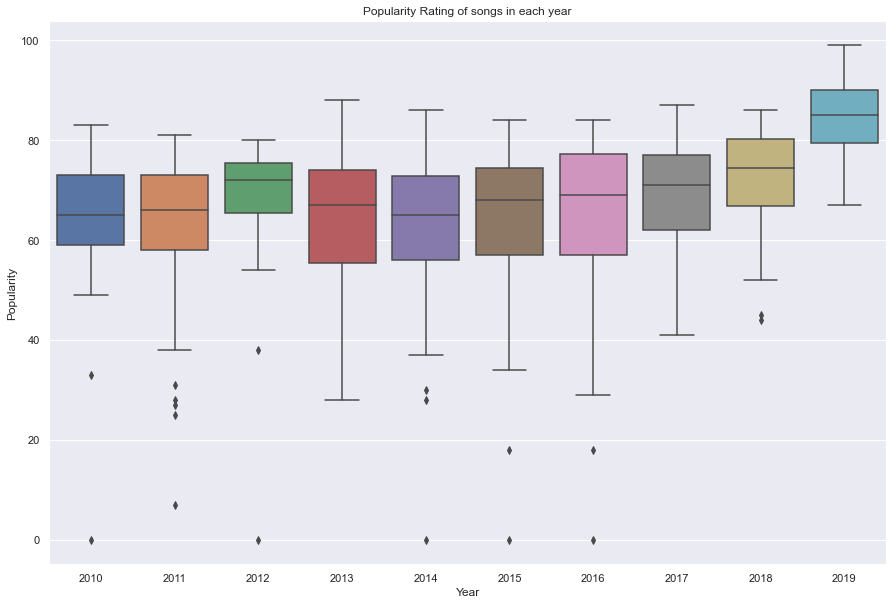

In [70]:
#Boxplot
plt.subplots(figsize=(15,10))
sns.boxplot(x="Year",y= "Popularity", data=spotify_df)
plt.title('Popularity Rating of songs in each year')

In [48]:
# Artist vs Popularity

px.scatter(
    spotify_df,
    x = 'Artist',
    y = 'Popularity',
    color = 'Genre',


)

In [ ]:
# Artist Popularity by rating vs Popularity by count


In [ ]:
# Do a correlation chart for the features of the top Songs by Popularity rating